## Import dependencies

In [31]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from fair import *

%matplotlib inline

# Running FaIRv2.0.0-alpha

### 1. Create FaIR compatible inputs

- FaIR uses a multi-index pandas dataframe structure for its input. These are largely identical to normal dataframes, but with some added nuances to using them properly.
- It uses this structure to require users to keep track of the scenarios they wish to run.

#### Emission and forcing inputs

In [32]:
# The following function returns an empty dataframe in the correct format for use in FaIR.

test_emissions = return_empty_emissions(df_to_copy=False, start_year=0, end_year=100, timestep=1, scen_names=['Test'], gases_in = ['carbon_dioxide','methane','nitrous_oxide'])

# Although here we demonstrate using FaIR in emissions driven mode, an identical format dataframe is used for concentrations driven mode.

# create an empty forcing dataframe compatible with test_emissions:

test_forcing = return_empty_forcing(test_emissions)

# Note that the scenario names in the emissions and forcing dataframe must be identical for the model to run: FaIR assumes each emissions scenario corresponds directly to a single forcing scenario.

test_emissions.head()

/opt/anaconda3/envs/fairv200_install/lib/python3.11/site-packages/fair/fair_runner.py:127: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0).apply(pd.to_numeric)
/opt/anaconda3/envs/fairv200_install/lib/python3.11/site-packages/fair/fair_runner.py:144: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0).apply(pd.to_numeric)


Scenario           Test                      
Gas      carbon_dioxide methane nitrous_oxide
Year                                         
0                     0       0             0
1                     0       0             0
2                     0       0             0
3                     0       0             0
4                     0       0             0

In [33]:
# Although these functions have been created for ease of use, to create a compatible dataframe from scratch, use the following commands:

empty_array = np.zeros(101)

test_emissions = pd.DataFrame({'carbon_dioxide':empty_array,'methane':empty_array,'nitrous_oxide':empty_array},index= np.arange(101))
test_emissions = pd.concat([test_emissions],keys=['Test'],axis=1)

test_emissions.head()

Test                      
  carbon_dioxide methane nitrous_oxide
0            0.0     0.0           0.0
1            0.0     0.0           0.0
2            0.0     0.0           0.0
3            0.0     0.0           0.0
4            0.0     0.0           0.0

#### Parameter inputs

- If these are not provided, FaIR will automatically use its default parameters

In [34]:
# Generate a default parameter dataframe:

test_gas_parameters = get_gas_parameter_defaults()

test_thermal_parameters = get_thermal_parameter_defaults()

# This is what the gas parameter dataframe looks like:
test_gas_parameters.head()

default                                                                  \
          bc bc|aci bc|bc_on_snow   c2f6  c3f8 c4f10 c5f12 c6f14 c7f16 c8f18   
a1       1.0    NaN           NaN    1.0   1.0   1.0   1.0   1.0   1.0   1.0   
a2       0.0    NaN           NaN    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
a3       0.0    NaN           NaN    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
a4       0.0    NaN           NaN    0.0   0.0   0.0   0.0   0.0   0.0   0.0   
tau1     1.0    NaN           NaN  100.0  26.0  26.0  41.0  31.0  30.0  30.0   

      ...                                                                     \
      ...  nox nox_avi nox_avi|contrails nox|o3   oc oc|aci   sf6  so2 so2f2   
a1    ...  1.0     1.0               NaN    NaN  1.0    NaN   1.0  1.0  1.00   
a2    ...  0.0     0.0               NaN    NaN  0.0    NaN   0.0  0.0  0.00   
a3    ...  0.0     0.0               NaN    NaN  0.0    NaN   0.0  0.0  0.00   
a4    ...  0.0     0.0               NaN    NaN  0.0    NaN   0.0  0.0  0.00   
tau1  ...  1.0     1.0               NaN    NaN  1.0    NaN  32.0  1.0  0.36   

              
     so2|aci  
a1       NaN  
a2       NaN  
a3       NaN  
a4       NaN  
tau1     NaN  

[5 rows x 81 columns]

we need to reindex this to only include the gas species in our emissions dataframe

In [35]:
test_gas_parameters = test_gas_parameters.reindex(test_emissions.columns.levels[1],axis=1,level=1)
test_gas_parameters

default                          
          carbon_dioxide     methane nitrous_oxide
a1          2.173000e-01    1.000000      1.000000
a2          2.240000e-01    0.000000      0.000000
a3          2.824000e-01    0.000000      0.000000
a4          2.763000e-01    0.000000      0.000000
tau1        1.000000e+09    8.250000    100.000000
tau2        3.944000e+02    1.000000      1.000000
tau3        3.654000e+01    1.000000      1.000000
tau4        4.304000e+00    1.000000      1.000000
r0          3.390000e+01    8.250000     63.200000
rC          1.880000e-02    0.000000      0.000000
rT          2.670000e+00   -0.300000      0.000000
rA          0.000000e+00    0.000320      0.000000
PI_conc     2.780000e+02  720.000000    270.000000
emis2conc   4.688876e-01    0.351666      0.200952
f1          4.570000e+00    0.000000      0.000000
f2          0.000000e+00    0.000000      0.000000
f3          8.600000e-02    0.038000      0.106000

In [36]:
# This is what the thermal parameter dataframe looks like:
test_thermal_parameters

default                      
        1         2           3
d   0.903  7.920000  355.000000
q   0.180  0.296755    0.385908

In [37]:
# This allows you to check the parameters for any of the species available in return_gas_namelist()

get_gas_parameter_defaults(['carbon_dioxide']).T

,,a1,a2,a3,a4,tau1,tau2,tau3,tau4,r0,rC,rT,rA,PI_conc,emis2conc,f1,f2,f3
default,carbon_dioxide,0.2173,0.224,0.2824,0.2763,1.000000e+09,394.4,36.54,4.304,33.9,0.0188,2.67,0.0,278.0,0.468888,4.57,0.0,0.086


### 2. Running FaIR

In [141]:
# Let's carry out a few basic runs now, starting with pulse emissions for each gas.

# First generate an empty emissions dataframe with four different scenarios

pulse_emissions = return_empty_emissions(df_to_copy=False, start_year=100, end_year=0, timestep=-1, scen_names=['None']+[x+'pulse' for x in ['carbon_dioxide','methane','nitrous_oxide']], gases_in = ['carbon_dioxide','methane','nitrous_oxide'])

# add pulses in year 10 (the units are GtC, MtCH4 and MtN2O-N2):

for gas in ['carbon_dioxide','methane','nitrous_oxide']:
    
    pulse_emissions.loc[99,(gas+'pulse',gas)] += 10
    
# Now generate a compatible forcing dataframe:

pulse_forcing = return_empty_forcing(pulse_emissions)

# And run the model!

pulse_run = run_FaIR(emissions_in=pulse_emissions,forcing_in=pulse_forcing,gas_parameters=test_gas_parameters,thermal_parameters=test_thermal_parameters)

Integrating 4 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['carbon_dioxide', 'methane', 'nitrous_oxide'] forcing agents, between 100 and 2...


/opt/anaconda3/envs/fairv200_install/lib/python3.11/site-packages/fair/fair_runner.py:127: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0).apply(pd.to_numeric)
/opt/anaconda3/envs/fairv200_install/lib/python3.11/site-packages/fair/fair_runner.py:144: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0).apply(pd.to_numeric)
100%|██████████████████████████████████| 98/98 [00:00<00:00, 3113.50 timestep/s]


In [142]:
# FaIR outputs a dictionary of the variables it diagnoses & inputs on each run:

print('Diagnosed variables:',list(pulse_run.keys()))

Diagnosed variables: ['C', 'RF', 'T', 'alpha', 'Emissions', 'gas_parameters', 'thermal parameters']


In [146]:
# For example, let's look at the simulated concentrations from FaIR:

# FaIR keeps track in the dataframe of exactly which scenario, gas parameters and thermal parameters correspond to in the output:
## nb. here gas parameter and thermal parameters had identical indices so were assumed to be degenerate
print(pulse_run)

{'C': Scenario                None                       carbon_dioxidepulse  \
Gas cycle set        default                                   default   
Gas name      carbon_dioxide methane nitrous_oxide      carbon_dioxide   
Year                                                                     
100                    278.0   720.0         270.0          278.000000   
99                     278.0   720.0         270.0          280.978534   
98                     278.0   720.0         270.0          286.853165   
97                     278.0   720.0         270.0          299.709719   
96                     278.0   720.0         270.0          355.708449   
...                      ...     ...           ...                 ...   
6                      278.0   720.0         270.0                 NaN   
5                      278.0   720.0         270.0                 NaN   
4                      278.0   720.0         270.0                 NaN   
3                      278.0   7

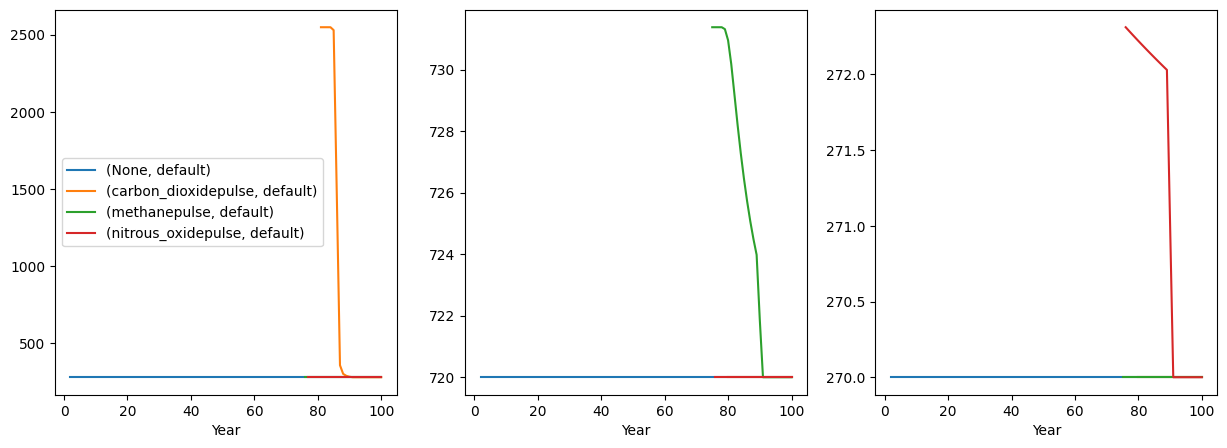

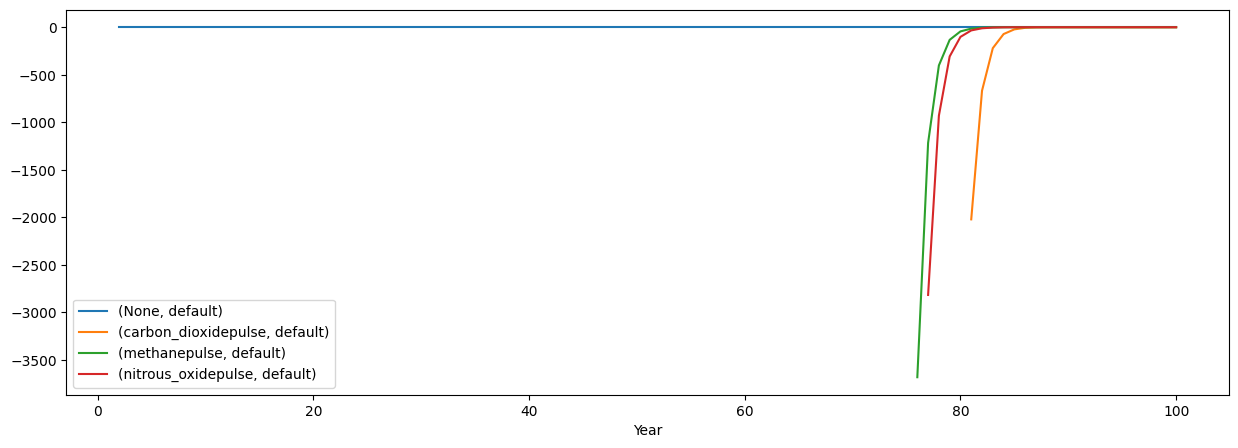

In [136]:
# Example of plotting the various scenarios against one another (also note .xs, a very handy pandas function for multi-index dataframes):

fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,gas in enumerate(['carbon_dioxide','methane','nitrous_oxide']):
    
    pulse_run['C'].xs(gas,level=-1,axis=1).plot(ax=ax[i],legend=False)
    
ax[0].legend()

fig,ax = plt.subplots(1,1,figsize=(15,5))

pulse_run['T'].plot(ax=ax,legend=False)

ax.legend()


## Overview of I/O structure
- The corresponding indices of each input dataframe must match or an error will occur:
    - SCENARIO in emissions_in / concentrations_in / forcing_in
    - GAS_NAMES in emissions_in / concentrations_in / gas_parameters
- If the indices of any unmatched dimensions are identical, the model will assume these dimensions are degenerate. (so if you run 3 gas parameter sets called ['high','middle','low'] with 3 thermal parameter sets called ['high','middle','low'], the model will remove one dimension & match up the sets (running 3 simulations instead of 9).

# Forcing-only example (pulse emission)

Integrating 1 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['bc', 'bc|aci', 'bc|bc_on_snow', 'c2f6', 'c3f8', 'c4f10', 'c5f12', 'c6f14', 'c7f16', 'c8f18', 'c_c4f8', 'carbon_dioxide', 'carbon_tetrachloride', 'carbon_tetrachloride|o3', 'cf4', 'cfc11', 'cfc113', 'cfc113|o3', 'cfc114', 'cfc114|o3', 'cfc115', 'cfc115|o3', 'cfc11|o3', 'cfc12', 'cfc12|o3', 'ch2cl2', 'ch2cl2|o3', 'ch3ccl3', 'ch3ccl3|o3', 'chcl3', 'chcl3|o3', 'co', 'co|o3', 'halon1202', 'halon1202|o3', 'halon1211', 'halon1211|o3', 'halon1301', 'halon1301|o3', 'halon2402', 'halon2402|o3', 'hcfc141b', 'hcfc141b|o3', 'hcfc142b', 'hcfc142b|o3', 'hcfc22', 'hcfc22|o3', 'hfc125', 'hfc134a', 'hfc143a', 'hfc152a', 'hfc227ea', 'hfc23', 'hfc236fa', 'hfc245fa', 'hfc32', 'hfc365mfc', 'hfc4310mee', 'methane', 'methane|strat_h2o', 'methane|o3', 'methyl_bromide', 'methyl_bromide|o3', 'methyl_chloride', 'methyl_chloride|o3', 'nf3', 'nh3', 'nitrous_oxide', 'nitrous_oxide|o3', 'nmvoc', 'nmvoc|o3', 'nox', 'nox_avi'

/opt/anaconda3/envs/fairv200_install/lib/python3.11/site-packages/fair/fair_runner.py:152: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0).apply(pd.to_numeric)
/opt/anaconda3/envs/fairv200_install/lib/python3.11/site-packages/fair/fair_runner.py:119: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0).apply(pd.to_numeric)
100%|████████████████████████████████| 100/100 [00:00<00:00, 5225.77 timestep/s]


<Axes: xlabel='Year'>

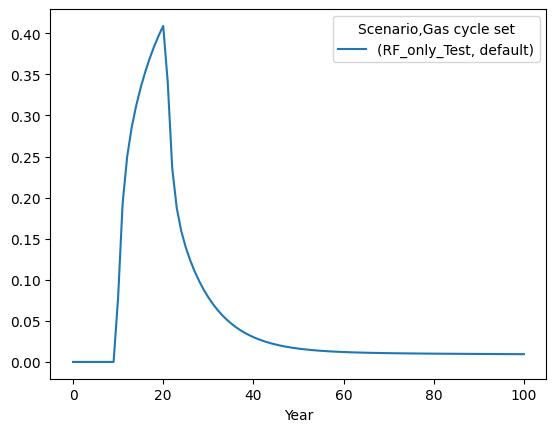

In [42]:
# A forcing-only run

RF_only_test = return_empty_forcing(start_year=0,end_year=100,scen_names=['RF_only_Test'])

## let's try a step change in RF

RF_only_test.loc[10:20]=1

RF_only_results = run_FaIR(emissions_in=return_empty_emissions(RF_only_test),forcing_in=RF_only_test)

RF_only_results['T'].plot()

# Concentration-driven example

In [43]:
# A concentration-only run

## The main bit to remember here is that FaIR is baselined at the pre-industrial concentration values!

## Let's try a 1%/yr scenario for each gas:
concentration_only_test = return_empty_emissions(df_to_copy=False, start_year=0, end_year=160, timestep=1, scen_names=[x+'_1%' for x in ['carbon_dioxide','methane','nitrous_oxide']], gases_in = ['carbon_dioxide','methane','nitrous_oxide'])

# Baseline to pre-industrial values 
# start a 1%/yr increase in year 10
for gas in ['carbon_dioxide','methane','nitrous_oxide']:
    
    concentration_only_test.loc[:,(slice(None),gas)] = get_gas_parameter_defaults().copy().loc['PI_conc',('default',gas)]
    
    concentration_only_test.loc[10:,(gas+'_1%',gas)] = concentration_only_test.loc[10,(gas+'_1%',gas)] * 1.01 ** (concentration_only_test.loc[10:].index-concentration_only_test.loc[10:].index[0])

# Run the experiment:

concentration_only_test_results = run_FaIR(concentrations_in=concentration_only_test,forcing_in=return_empty_forcing(concentration_only_test),gas_parameters=test_gas_parameters,thermal_parameters=test_thermal_parameters)

/opt/anaconda3/envs/fairv200_install/lib/python3.11/site-packages/fair/fair_runner.py:127: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0).apply(pd.to_numeric)


Integrating 3 scenarios, 1 gas cycle parameter sets, 1 thermal response parameter sets, over ['carbon_dioxide', 'methane', 'nitrous_oxide'] forcing agents, between 0 and 160...


/var/folders/dd/n_9wp4x11tn45bzqgcwvt_pr0000gp/T/ipykernel_97621/1920209907.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 278.          280.78        283.5878      286.423678    289.28791478
  292.18079393  295.10260187  298.05362789  301.03416416  304.04450581
  307.08495086  310.15580037  313.25735838  316.38993196  319.55383128
  322.74936959  325.97686329  329.23663192  332.52899824  335.85428822
  339.21283111  342.60495942  346.03100901  349.4913191   352.98623229
  356.51609461  360.08125556  363.68206812  367.3188888   370.99207769
  374.70199846  378.44901845  382.23350863  386.05584372  389.91640216
  393.81556618  397.75372184  401.73125906  405.74857165  409.80605736
  413.90411794  418.04315912  422.22359071  426.44582662  430.71028488
  435.01738773  439.36756161  443.76123722  448.1988496   452.68083809
  457.20764647  461.77972294  466.39752017  471.06149537  475.77211032
  480.5

Text(0.5, 1.0, '1%/yr concentration increase temperatures')

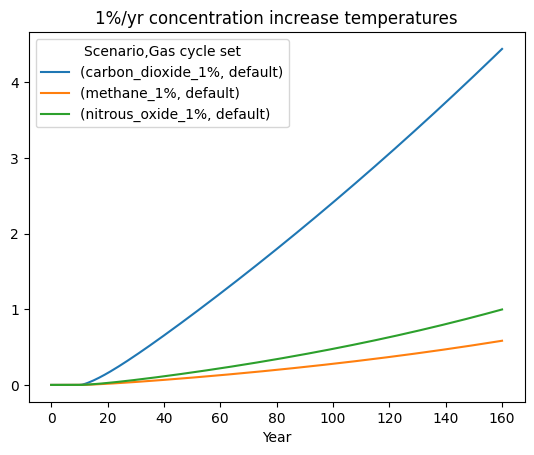

In [44]:
concentration_only_test_results['T'].plot()
plt.title('1%/yr concentration increase temperatures')

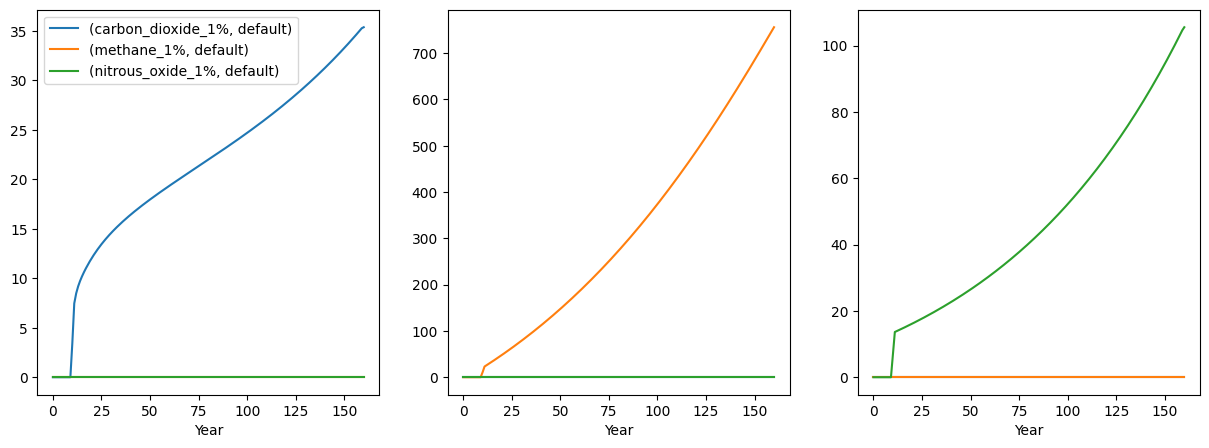

In [45]:
# By default, when a concentration run is carried out, FaIR diagnoses the corresponding emissions required to obtain those concentrations:

fig,ax = plt.subplots(1,3,figsize=(15,5))

for i,gas in enumerate(['carbon_dioxide','methane','nitrous_oxide']):
    
    concentration_only_test_results['Emissions'].xs(gas,level=-1,axis=1).plot(ax=ax[i],legend=False)

ax[0].legend()
    

## Parameter ensembles
Much like how we can run multiple scenarios (as above) simultaneously in one run_FaIR call, we can also run multiple parameter sets by simply joining parameter dataframes together.

In [46]:
# for this example, we'll just run a single scenario with perturbed carbon cycle & climate response parameters

## perturbing cc params
base_cc_params = test_gas_parameters['default'][['carbon_dioxide']]
pert_cc_params = []
cc_param_sets = ['high_cc','medium_cc','low_cc']
cc_r_param_change = [1.13,1,0.87]

for i,cc_set in enumerate(cc_param_sets):
    
    param_set = base_cc_params.copy()
    param_set.loc[['r0','rC','rT','rA']] *= cc_r_param_change[i]
    pert_cc_params += [param_set]
    
pert_cc_params = pd.concat(pert_cc_params,axis=1,keys=cc_param_sets)
pert_cc_params
#the r0 rC and rT paramters vary

,high_cc,medium_cc,low_cc
,carbon_dioxide,carbon_dioxide,carbon_dioxide
a1,2.173000e-01,2.173000e-01,2.173000e-01
a2,2.240000e-01,2.240000e-01,2.240000e-01
a3,2.824000e-01,2.824000e-01,2.824000e-01
a4,2.763000e-01,2.763000e-01,2.763000e-01
tau1,1.000000e+09,1.000000e+09,1.000000e+09
tau2,3.944000e+02,3.944000e+02,3.944000e+02
tau3,3.654000e+01,3.654000e+01,3.654000e+01
tau4,4.304000e+00,4.304000e+00,4.304000e+00
r0,3.830700e+01,3.390000e+01,2.949300e+01


In [47]:
## perturbing climate response params
resp_param_sets = ['high_clim','medium_clim','low_clim']
ECS_vals = np.array([4.5,3,1.5])
TCR_vals = np.array([3,2,1])
RWF_vals = TCR_vals / ECS_vals

pert_resp_params = pd.concat([get_thermal_parameter_defaults(TCR=TCR_vals[i],RWF=RWF_vals[i])['default'] for i in np.arange(3)],axis=1,keys=resp_param_sets)
pert_resp_params

high_clim                       medium_clim                       low_clim  \
          1         2           3           1         2           3        1   
d     0.903  7.920000  355.000000       0.903  7.920000  355.000000    0.903   
q     0.180  0.663261    0.353866       0.180  0.374566    0.243518    0.180   

                        
          2          3  
d  7.920000  355.00000  
q  0.085872    0.13317

In [48]:
# we'll run a pulse-emission under these nine possible parameter combinations

perturbed_param_scenarios = return_empty_emissions(start_year=0,end_year=500,scen_names=['100GtC_pulse'],gases_in=['carbon_dioxide'])
perturbed_param_scenarios.iloc[1,0] = 100

perturbed_parameter_example = run_FaIR(emissions_in=perturbed_param_scenarios,
                                      gas_parameters=pert_cc_params,
                                      thermal_parameters=pert_resp_params)

Integrating 1 scenarios, 3 gas cycle parameter sets, 3 thermal response parameter sets, over ['carbon_dioxide'] forcing agents, between 0 and 500...


/opt/anaconda3/envs/fairv200_install/lib/python3.11/site-packages/fair/fair_runner.py:127: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(0).apply(pd.to_numeric)
100%|████████████████████████████████| 500/500 [00:00<00:00, 5178.70 timestep/s]


In [49]:
## example of what the output looks like:
perturbed_parameter_example['T'].head()

Scenario      100GtC_pulse                                              \
Gas cycle set      high_cc                       medium_cc               
Thermal set      high_clim medium_clim  low_clim high_clim medium_clim   
Year                                                                     
0                 0.000000    0.000000  0.000000  0.000000    0.000000   
1                 0.038831    0.032129  0.025426  0.037414    0.030956   
2                 0.130400    0.105656  0.080916  0.124783    0.101091   
3                 0.207261    0.162486  0.117734  0.196557    0.154014   
4                 0.246013    0.185625  0.125293  0.231700    0.174668   

Scenario                                                 
Gas cycle set              low_cc                        
Thermal set    low_clim high_clim medium_clim  low_clim  
Year                                                     
0              0.000000  0.000000    0.000000  0.000000  
1              0.024498  0.035743    0.029573  0.023404  
2              0.077402  0.118597    0.096070  0.073547  
3              0.111490  0.185571    0.145352  0.105147  
4              0.117681  0.217613    0.163937  0.110298

Text(0.5, 1.0, 'Year 1 100GtC pulse temperature response under a range of carbon-cycle & climate response parameters')

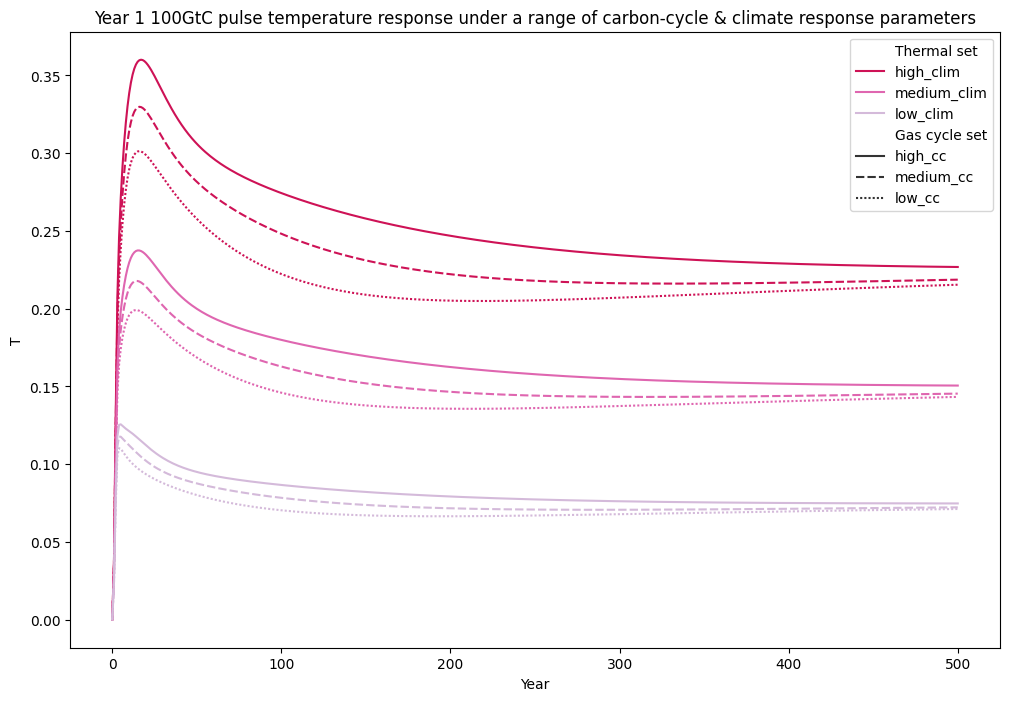

In [50]:
# here I'll just show how seaborn can give useful visualisations from FaIR output
fig,ax = plt.subplots(figsize=(12,8))
g=sn.lineplot(data=perturbed_parameter_example['T'].unstack().reset_index().rename({0:'T'},axis=1),
              x='Year',y='T',
              hue='Thermal set',
              style='Gas cycle set',
              palette='PuRd_r',
              ax=ax)

plt.title('Year 1 100GtC pulse temperature response under a range of carbon-cycle & climate response parameters')

# End of example notebook
There are additional features (eg. variable timestepping) that could be included at this point, but they are less supported and will not be used in other notebooks in this repository.